In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.manifold import SpectralEmbedding
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

In [2]:
zachary_dataset = nx.karate_club_graph()
X = nx.to_numpy_array(zachary_dataset)
position = nx.spring_layout(zachary_dataset, seed=55)
N = len(X)

In [3]:
labels = []
for i in zachary_dataset.nodes:
    club_names = zachary_dataset.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) 


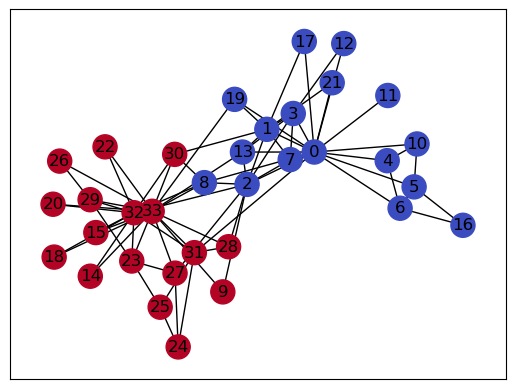

In [4]:
zachary_dataset.remove_edges_from(nx.selfloop_edges(zachary_dataset))
layout_pos = nx.spring_layout(zachary_dataset,seed=51)
nx.draw_networkx(zachary_dataset, pos = layout_pos , node_color = labels, cmap = 'coolwarm')

In [5]:
embedding = SpectralEmbedding(n_components=2)
X_trans = embedding.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_trans)
kmeans.labels_
normalized_mutual_info_score(labels, kmeans.labels_)

0.32272511107306034

In [6]:
X__ = np.zeros((N,N),np.float64)


Update Edges


In [7]:
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        if X[i][j] > 0:
            X__[i][j] = X[i][j]
        else:
            for k in range(N):
                if k == i or k == j:
                    continue
                if X[i][k] * X[k][j] > 0:
                    if X__[i][j] == 0:
                        X__[i][j] = 1 / (X[i][k] + X[k][j])
                    else:
                        X__[i][j] = max(X__[i][j], 1 / (X[i][k] + X[k][j]))


In [15]:
embedding = SpectralEmbedding(n_components=2 #, n_neighbors=2
                              )
X_trans = embedding.fit_transform(X__)
X_trans.shape

(34, 2)

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_trans)
kmeans.labels_
normalized_mutual_info_score(labels, kmeans.labels_)

0.32272511107306034